In [1]:
import pandas as pd
import seaborn as sns
results = pd.read_csv('results.csv', index_col=None)
for name in ['_no_block', '_cbh', '_degree']:
    results['total' + name] = sum(results[str(i)+name] for i in range(1, 4)).subtract(20) 
sns.set()
results = results[results.seed_size == 20]
results.head()

,network_name,threshold,seed_size,budget_total,0_no_block,1_no_block,2_no_block,3_no_block,0_cbh,1_cbh,2_cbh,3_cbh,0_degree,1_degree,2_degree,3_degree,total_no_block,total_cbh,total_degree
39,fb-pages-politician,2,20,29,889.0,0.0,0.0,5019.0,910.3,10.9,0.9,4985.9,1019.2,1.2,0.0,4887.6,4999.0,4977.7,4868.8
40,fb-pages-politician,2,20,59,889.0,0.0,0.0,5019.0,940.6,5.6,4.2,4957.6,1062.8,3.6,0.0,4841.6,4999.0,4947.4,4825.2
41,fb-pages-politician,2,20,118,889.0,0.0,0.0,5019.0,941.0,29.7,37.1,4900.2,1136.8,0.0,0.0,4771.2,4999.0,4947.0,4751.2
42,fb-pages-politician,2,20,177,889.0,0.0,0.0,5019.0,1050.2,22.5,24.9,4810.4,1198.8,1.0,0.0,4708.2,4999.0,4837.8,4689.2
43,fb-pages-politician,2,20,236,889.0,0.0,0.0,5019.0,1548.4,1461.0,507.7,2390.9,1248.8,0.0,0.0,4659.2,4999.0,4339.6,4639.2


In [2]:
for i in range(results.shape[0]):
    if results.iloc[i,0] == "astroph":
        results.iloc[i, 3] /= 18771
        for j in range(results.shape[1] - 3, results.shape[1]):
            results.iloc[i,j] /= 18771
    elif results.iloc[i,0] == "fb-pages-politician":
        results.iloc[i, 3] /= 5908
        for j in range(results.shape[1] - 3, results.shape[1]):
            results.iloc[i,j] /= 5908
    elif results.iloc[i,0] == "wiki":
        results.iloc[i, 3] /= 7066
        for j in range(results.shape[1] - 3, results.shape[1]):
            results.iloc[i,j] /= 7066
    

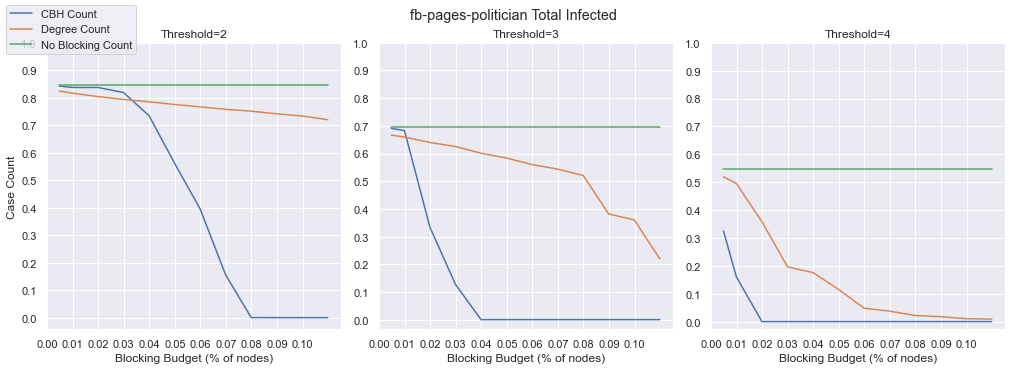

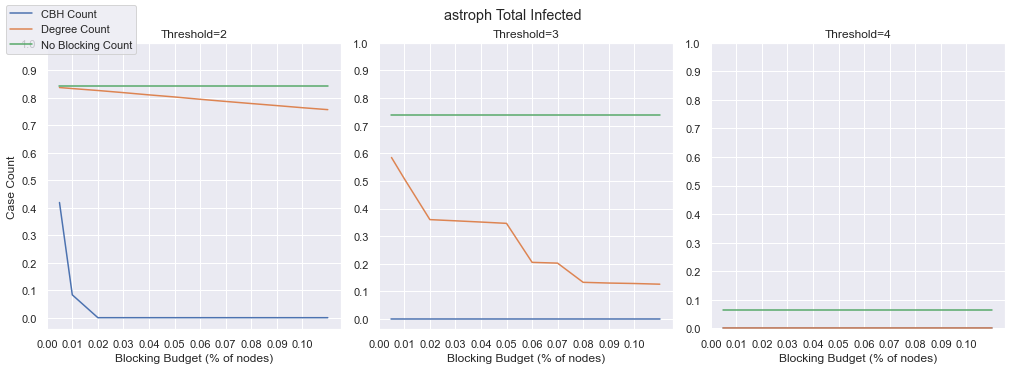

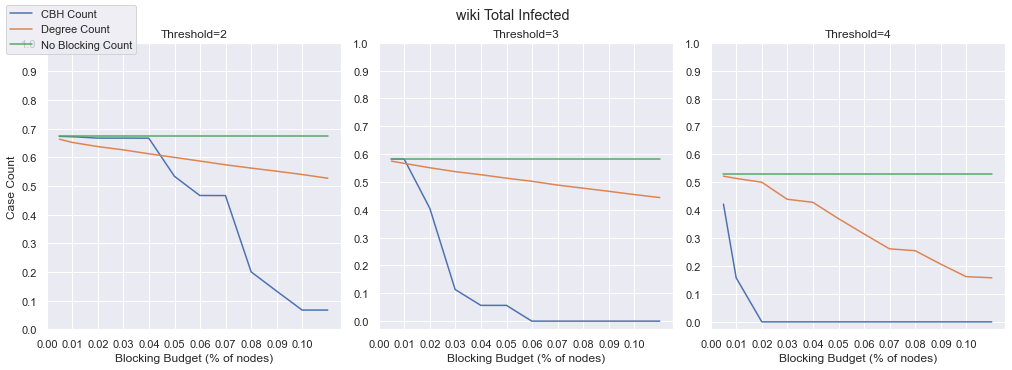

In [3]:
import matplotlib.pyplot as plt
import numpy as np
names = ['fb-pages-politician','astroph', 'wiki']
thres = [2, 3, 4]

for name in names:
    threshold = results[results.network_name == name]
    fig, ax = plt.subplots(1,3, figsize=(14, 5))
    fig.suptitle(name + " Total Infected")
#        threshold = threshold[threshold.seed_size == 10]
    for i in range(len(thres)):
        subdf = threshold[threshold.threshold == thres[i]]
        cbh, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_cbh)[:-1])
        degree, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_degree)[:-1])
        no_block, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_no_block)[:-1])
        ax[i].set_xticks(np.arange(0, .11, .01))
        ax[i].set_yticks(np.arange(0, 1.1, .1))
    fig.tight_layout(pad=1)
    fig.legend([cbh, degree, no_block], ['CBH Count', "Degree Count", "No Blocking Count"], loc='upper left')
    for i in range(3):
        ax[i].set_xlabel("Blocking Budget (% of nodes)")
        ax[i].set_title("Threshold=" + str(thres[i]))
    ax[0].set_ylabel("Case Count")
    plt.savefig("infected_cnt_" + name + ".pdf", bbox_inches="tight")

In [4]:
astroph = results[(results.network_name == "astroph")]

astro_sub_df = astroph[['total_no_block', 'threshold', 'total_degree', 'total_cbh']]
astro_sub_df

,total_no_block,threshold,total_degree,total_cbh
117,0.841298,2,0.585510,0.586575
118,0.841298,2,0.083032,0.083139
119,0.841298,2,0.000000,0.000000
120,0.841298,2,0.000000,0.000000
121,0.841298,2,0.000000,0.000000
122,0.841298,2,0.000000,0.000000
123,0.841298,2,0.000000,0.000000
124,0.841298,2,0.000000,0.000000
125,0.841298,2,0.000000,0.000000
126,0.841298,2,0.000000,0.000000
